# Re-weighting

OpenFisca-UK primarily relies on the Family Resources Survey, which has known issues with non-capture of households at the bottom and top of the income distribution. To correct for this, we apply a weight modification, optimised using gradient descent to minimise survey error against a diverse selection of targeting statistics. These include:

* Country-level program statistics
* Regional populations
* Tax revenues by income range
* Taxpayer counts by tax band
* UK population
* UK population age distribution
* UK-wide program statistics

The graph below shows the effect of the optimisation on each of these, compared to their starting values (under original FRS weights).

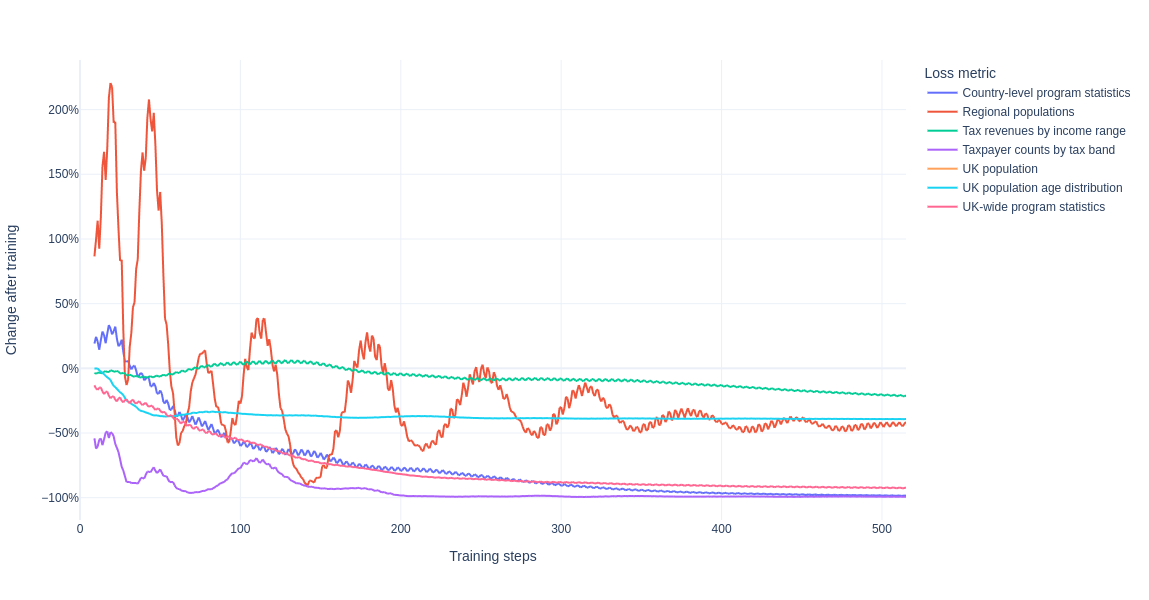

In [21]:
import yaml
from openfisca_uk import REPO

with open(REPO / "calibration" / "losses.yaml", "r") as f:
    losses = yaml.safe_load(f)

import pandas as pd
import plotly.express as px

df = pd.DataFrame(losses)

px.line(df.rolling(10).mean() / df.iloc[0] - 1, y=df.columns).update_layout(
    template="plotly_white",
    legend_title="Loss metric",
    yaxis_tickformat=".0%",
    width=800,
    height=600,
    yaxis_title="Change after training",
    xaxis_title="Training steps"
)